In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
%matplotlib inline

In [2]:
yearly = pd.read_csv('datasets\yearly_deaths_by_clinic.csv')

In [3]:
yearly


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [4]:
yearly["proportion_deaths"] = yearly['deaths']/yearly['births']

In [5]:
yearly1 = yearly[yearly['clinic']=='clinic 1']
yearly2 = yearly[yearly['clinic']=='clinic 2']

In [6]:
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


Text(0, 0.5, 'Proportional_Deaths')

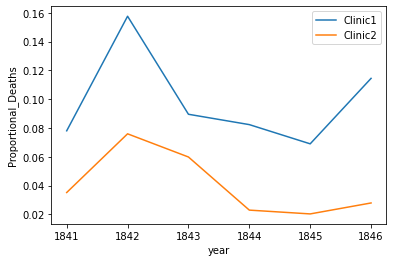

In [7]:
ax = yearly1.plot(x="year", y="proportion_deaths",
              label="Clinic1")
yearly2.plot(x="year", y="proportion_deaths",
         label="Clinic2", ax=ax)

ax.set_ylabel('Proportional_Deaths')

In [8]:
monthly = pd.read_csv('datasets\monthly_deaths.csv',parse_dates=["date"])

In [9]:
monthly['proportion_deaths'] = monthly['deaths']/monthly['births']

In [10]:
monthly.head(1)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669


Text(0, 0.5, 'Proportion deaths')

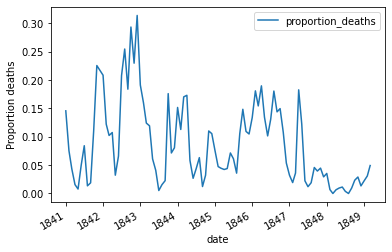

In [11]:
ax =  monthly.plot(x='date',y='proportion_deaths')
ax.set_ylabel('Proportion deaths')

In [12]:
monthly


,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


In [13]:
handwashing_start = pd.to_datetime("1847-1-1")
before_washing= monthly[monthly['date']<handwashing_start]
after_washing =  monthly[monthly['date']>=handwashing_start]

Text(0, 0.5, 'Proportional deaths')

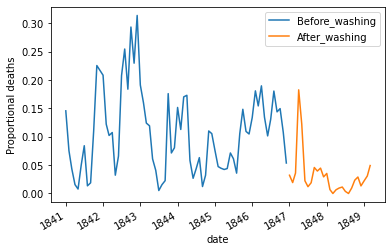

In [14]:
ax= before_washing.plot(x='date',y='proportion_deaths',label='Before_washing')
after_washing.plot(x='date',y='proportion_deaths',label='After_washing',ax=ax)
ax.set_ylabel('Proportional deaths')

In [15]:
before_proportion = before_washing['proportion_deaths'].mean()
after_proportion= after_washing['proportion_deaths'].mean()

average_reduction = after_proportion-before_proportion
average_reduction

-0.07519076642777142

In [16]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_washing['proportion_deaths'].sample(frac= 1,replace=True)
    boot_after = after_washing['proportion_deaths'].sample(frac= 1,replace=True)
    boot_mean_diff.append(boot_after.mean()-boot_before.mean())



In [17]:
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -0.095728
0.975   -0.052578
dtype: float64

In [18]:
doctors_should_wash_hands = True